<a href="https://colab.research.google.com/github/maelleal/TCC_Recomendacao_INE/blob/main/TabularClassificationAREA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fastai
from fastai.tabular import *
from fastai.tabular.all import *
import pandas as pd
import numpy as np
import pathlib

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
path = pathlib.Path('/content/drive/My Drive/TCC - Sistema recomendação INE')
df = pd.read_excel(path/'tabela_modelo_medias_v5.xlsx')
df = df.drop(columns=['ID_UFSC', 'MATRICULA', 'COD_AREA', 'MEDIA_NOTA'])

df.head(n=4)

,CURSO,AREA,ORIENTADOR,CLASSIF_AREA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13
0,CIÊNCIAS DA COMPUTAÇÃO,Teoria da Computação e Linguagens,Jerusa Marchi,INE5430 - Inteligência Artificial,8.50,7.00,7.34,9.17,8.13,8.0,7.75,7.50,8.50,6.84,7.38,7.79,7.0
1,CIÊNCIAS DA COMPUTAÇÃO,"Engenharia de Software, Gerência de Projetos",Jean Carlo Rossa Hauck,INE5617 - Gerência de Projetos,7.75,6.50,8.00,7.17,7.67,8.5,7.34,8.00,9.63,7.50,8.63,7.09,8.0
2,SISTEMAS DE INFORMAÇÃO (noturno),"Engenharia de Software, Gerência de Projetos",Fabiane Barreto Vavassori Benitti,INE5614 - Engenharia de Software,9.00,7.40,6.60,8.50,8.00,7.5,7.25,8.63,8.10,7.67,6.50,7.50,0.0
3,SISTEMAS DE INFORMAÇÃO (noturno),Fundamentos de Programação,Fernando Augusto da Silva Cruz,INE5646 - Programação para Web,8.67,7.25,7.30,7.00,6.00,6.0,7.50,8.17,7.50,7.50,6.25,7.25,0.0


In [162]:
#The list of categorical features in the dataset
cat_names = ['CURSO', 'ORIENTADOR', 'AREA', 'CLASSIF_AREA'] 

#The list of continuous features in the dataset
#Exclude the Dependent variable 'AREA'
cont_names =['Area1', 'Area2', 'Area3', 'Area4', 'Area5', 'Area6', 'Area7', 'Area8', 'Area9', 'Area10', 'Area11', 'Area12', 'Area13'] 


In [163]:
cat = Categorify()

In [164]:
to = TabularPandas(df, cat, cat_names)

In [165]:
cats = to.procs.categorify

In [166]:
norm = Normalize()

In [167]:
to = TabularPandas(df, norm, cont_names=cont_names, cat_names=cat_names)

In [168]:
norms = to.procs.normalize

In [169]:
to.conts.head()

,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13
0,0.428565,-0.089127,-0.290668,1.443855,1.118808,0.390194,0.132630,-0.085738,0.256315,-0.404233,0.173227,0.772250,0.812904
1,-0.353927,-0.437277,0.342053,-0.600686,0.621272,0.819369,-0.200255,0.308498,0.980683,0.253742,1.460937,0.571616,1.073697
2,0.950226,0.189394,-1.000082,0.758933,0.978200,-0.038982,-0.273327,0.805236,-0.000098,0.423221,-0.733321,0.689130,-1.012647
3,0.605930,0.084949,-0.329015,-0.774472,-1.185003,-1.326508,-0.070348,0.442538,-0.384719,0.253742,-0.990863,0.617475,-1.012647
4,0.428565,-0.785428,-0.808348,0.380694,-0.103401,-0.468157,0.741566,-1.268445,0.192211,-0.743191,0.430769,0.689130,0.682507


In [170]:
fm = FillMissing(fill_strategy=FillStrategy.median)

In [171]:
to = TabularPandas(df, fm, cont_names=cont_names)

In [172]:
to.cat_names

(#0) []

In [173]:
cats['AREA']

['#na#', 'Ciência, Tecnologia, Sociedade e Emprendedorismo', 'Engenharia de Software, Gerência de Projetos', 'Fundamentos Matemáticos', 'Fundamentos de Programação', 'Organização de Computadores e Sistemas Embarcados', 'Probabilidade e Estatística', 'Redes de Computadores e Segurança', 'Sistemas Operacionais, Concorrência e Paralelismo', 'Teoria da Computação e Linguagens', 'Tratamento e Banco de Dados']

In [174]:
splits = RandomSplitter()(range_of(df))
splits

((#260) [274,18,20,223,236,247,51,302,262,108...],
 (#65) [199,39,185,137,272,300,256,150,205,299...])

In [175]:
range_of(df)[:5], len(df)

([0, 1, 2, 3, 4], 325)

In [178]:
cat_names = ['CURSO', 'ORIENTADOR', 'CLASSIF_AREA'] 
cont_names = ['Area1', 'Area2', 'Area3', 'Area4', 'Area5', 'Area6', 'Area7', 'Area8', 'Area9', 'Area10', 'Area11', 'Area12', 'Area13'] 
procs = [Categorify, FillMissing, Normalize]
y_names = 'AREA'
y_block = CategoryBlock()

In [179]:
to = TabularPandas(df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=y_names, y_block=y_block, splits=splits)

In [180]:
dls = to.dataloaders()

In [181]:
trn_dl = TabDataLoader(to.train, bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [182]:
dls = DataLoaders(trn_dl, val_dl)

In [183]:
dls.show_batch()

,CURSO,ORIENTADOR,CLASSIF_AREA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13,AREA
0,CIÊNCIAS DA COMPUTAÇÃO,Frank Augusto Siqueira,INE5670 - Desenvolvimento de Sistemas Móveis e Embarcados,8.00,6.00,7.00,8.75,6.84,7.00,6.88,6.50,9.10,7.50,7.25,6.920000e+00,7.670000e+00,Fundamentos de Programação
1,SISTEMAS DE INFORMAÇÃO (noturno),Jerusa Marchi,INE5633 - Sistemas Inteligentes,7.60,9.09,6.50,8.00,8.50,8.25,10.00,8.75,8.34,8.00,8.20,1.754207e-07,1.155623e-07,Teoria da Computação e Linguagens
2,CIÊNCIAS DA COMPUTAÇÃO,Rafael Luiz Cancian,INE5416 - Paradigmas de Programação,9.00,6.00,8.17,9.34,7.34,9.00,7.34,7.00,9.13,7.84,7.75,7.420000e+00,7.630000e+00,Teoria da Computação e Linguagens
3,SISTEMAS DE INFORMAÇÃO (noturno),Raul Sidnei Wazlawick,INE5455 - Testes de Software,7.00,6.50,9.00,6.00,6.00,6.50,8.00,6.34,7.84,6.25,6.75,1.754207e-07,1.155623e-07,"Engenharia de Software, Gerência de Projetos"
4,SISTEMAS DE INFORMAÇÃO (noturno),Carina Friedrich Dorneles,INE5430 - Inteligência Artificial,7.70,8.92,10.00,9.50,7.50,7.75,8.75,8.50,8.67,7.00,8.25,1.754207e-07,1.155623e-07,Teoria da Computação e Linguagens
5,SISTEMAS DE INFORMAÇÃO (noturno),José Eduardo de Lucca,INE5428 - Informática e Sociedade,7.30,6.75,6.00,6.50,6.50,8.25,8.00,7.50,7.67,6.50,6.63,1.754207e-07,1.155623e-07,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
6,CIÊNCIAS DA COMPUTAÇÃO,Elder Rizzon Santos,INE5633 - Sistemas Inteligentes,8.00,7.50,9.30,8.84,8.17,7.00,7.34,8.50,9.50,7.67,7.88,8.700000e+00,8.400000e+00,Teoria da Computação e Linguagens
7,SISTEMAS DE INFORMAÇÃO (noturno),Carlos Becker Westphall,INE5680 - Segurança da Informação e de Redes,7.10,6.67,7.00,8.50,6.50,6.25,8.75,7.88,7.67,6.34,6.92,1.754207e-07,1.155623e-07,Redes de Computadores e Segurança
8,SISTEMAS DE INFORMAÇÃO (noturno),Joao Candido Lima Dovicchi,INE5670 - Desenvolvimento de Sistemas Móveis e Embarcados,8.00,6.88,6.59,6.00,6.00,6.00,6.50,9.00,6.50,7.00,6.00,7.420000e+00,1.155623e-07,Fundamentos de Programação
9,SISTEMAS DE INFORMAÇÃO (noturno),Jean Everson Martina,INE5429 - Segurança em Computação,7.25,7.00,10.00,8.50,6.50,7.50,9.75,8.00,7.67,6.67,7.09,1.754207e-07,1.155623e-07,Redes de Computadores e Segurança


In [184]:
to._dbunch_type == dls._dbunch_type

True

In [185]:
emb_szs = get_emb_sz(to); emb_szs

[(3, 3), (35, 12), (38, 12)]

In [186]:
to.cat_names

(#3) ['CURSO','ORIENTADOR','CLASSIF_AREA']

In [187]:
to['AREA'].nunique()

10

In [188]:
cont_len = len(to.cont_names); cont_len

13

In [189]:
batch = dls.one_batch(); len(batch)

3

In [190]:
batch[0][0], batch[1][0]

(tensor([ 1, 31, 17]),
 tensor([-0.8599, -0.5190, -0.8503, -1.1492, -0.6517, -0.4935, -1.2841, -1.3215,
         -0.0673,  0.0973, -0.1948,  0.4273,  0.7071]))

In [191]:
net = TabularModel(emb_szs, cont_len, 10, [200,100])

In [192]:
net

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(3, 3)
    (1): Embedding(35, 12)
    (2): Embedding(38, 12)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(13, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=40, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=10, bias=True)
    )
  )
)

In [193]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(valley=0.002511886414140463)

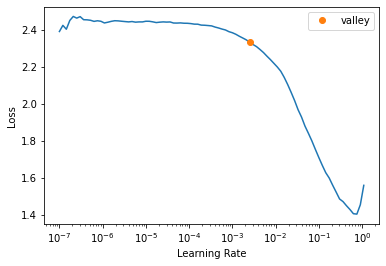

In [194]:
learn.lr_find()

In [195]:
dls = to.dataloaders()
learn = tabular_learner(dls, [200,100], metrics=accuracy)


In [196]:
learn.fit(20, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.467755,2.196307,0.215385,00:00
1,2.185036,2.055167,0.292308,00:00
2,1.915830,1.695137,0.584615,00:00
3,1.626076,1.129192,0.738462,00:00
4,1.339650,0.557292,0.846154,00:00
5,1.113593,0.305043,0.892308,00:00
6,0.939432,0.215774,0.938462,00:00
7,0.801354,0.166683,0.953846,00:00
8,0.687894,0.137249,0.953846,00:00
9,0.597000,0.125349,0.953846,00:00


In [197]:
# predição em lote
dl = learn.dls.test_dl(df.iloc[:100])

In [198]:
dl.show_batch()

,CURSO,ORIENTADOR,CLASSIF_AREA,Area1,Area2,Area3,Area4,Area5,Area6,Area7,Area8,Area9,Area10,Area11,Area12,Area13,AREA
0,CIÊNCIAS DA COMPUTAÇÃO,Jerusa Marchi,INE5430 - Inteligência Artificial,8.50,7.00,7.34,9.17,8.13,8.0,7.75,7.50,8.50,6.84,7.38,7.79,7.000000e+00,Teoria da Computação e Linguagens
1,CIÊNCIAS DA COMPUTAÇÃO,Jean Carlo Rossa Hauck,INE5617 - Gerência de Projetos,7.75,6.50,8.00,7.17,7.67,8.5,7.34,8.00,9.63,7.50,8.63,7.09,8.000000e+00,"Engenharia de Software, Gerência de Projetos"
2,SISTEMAS DE INFORMAÇÃO (noturno),Fabiane Barreto Vavassori Benitti,INE5614 - Engenharia de Software,9.00,7.40,6.60,8.50,8.00,7.5,7.25,8.63,8.10,7.67,6.50,7.50,1.155623e-07,"Engenharia de Software, Gerência de Projetos"
3,SISTEMAS DE INFORMAÇÃO (noturno),Fernando Augusto da Silva Cruz,INE5646 - Programação para Web,8.67,7.25,7.30,7.00,6.00,6.0,7.50,8.17,7.50,7.50,6.25,7.25,1.155623e-07,Fundamentos de Programação
4,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,8.50,6.00,6.80,8.13,7.00,7.0,8.50,6.00,8.40,6.50,7.63,7.50,6.500000e+00,Redes de Computadores e Segurança
5,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,8.50,7.50,7.25,7.00,6.84,6.0,7.00,6.75,8.75,6.84,6.63,7.00,6.840000e+00,"Ciência, Tecnologia, Sociedade e Emprendedorismo"
6,CIÊNCIAS DA COMPUTAÇÃO,Jean Everson Martina,INE5429 - Segurança em Computação,8.75,8.50,7.88,7.84,8.00,8.0,7.25,6.75,9.00,7.00,7.63,7.90,7.670000e+00,Redes de Computadores e Segurança
7,CIÊNCIAS DA COMPUTAÇÃO,Raul Sidnei Wazlawick,INE5404 - Programação Orientada a Objetos II,7.75,6.00,7.13,8.13,7.50,6.5,7.25,7.25,8.13,7.00,7.38,7.40,7.670000e+00,Fundamentos de Programação
8,CIÊNCIAS DA COMPUTAÇÃO,Rafael Luiz Cancian,INE5416 - Paradigmas de Programação,9.00,6.00,8.17,9.34,7.34,9.0,7.34,7.00,9.13,7.84,7.75,7.42,7.630000e+00,Teoria da Computação e Linguagens
9,CIÊNCIAS DA COMPUTAÇÃO,Alexandre Goncalves Silva,INE5420 - Computação Gráfica,9.75,8.50,8.75,9.50,9.25,9.5,7.00,8.75,8.60,8.50,8.13,8.30,9.130000e+00,Fundamentos Matemáticos


In [199]:
learn.validate(dl=dl)

(#2) [0.0047061629593372345,1.0]

In [200]:
learn.export('modeloParaPredicao.pk1')